## R-NSGA-II

<div style="display: block;margin-left: auto;margin-right: auto;width: 80%;">
![nsga2_survival](../resources/images/nsga2_survival.png)
</div>

<div style="display: block;margin-left: auto;margin-right: auto;width: 50%;">
![nsga2_crowding](../resources/images/nsga2_crowding.png)
</div>

### Example

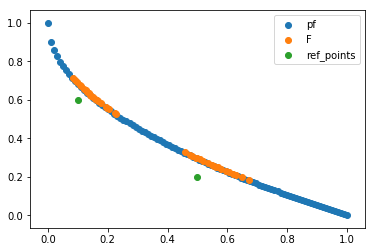

In [1]:
import numpy as np

from pymoo.optimize import minimize
from pymoo.util import plotting
from pymop.factory import get_problem

problem = get_problem("zdt1", n_var=30)
pf = problem.pareto_front()

# create the reference directions to be used for the optimization
ref_points = np.array([[0.5, 0.2], [0.1, 0.6]])

res = minimize(problem,
               method='rnsga2',
               method_args={
                   'pop_size': 40,
                   'ref_points': ref_points,
                   'epsilon': 0.01,
                   'normalization': 'front',
                   'survival_type': "closest",
                   'extreme_points_as_reference_points': False,
                   'weights': np.array([0.5, 0.5])
               },
               save_history=True,
               termination=('n_gen', 250),
               seed=1,
               pf=pf,
               disp=False)

plotting.plot(pf, res.F, ref_points, show=True, labels=['pf', 'F', 'ref_points'])



### API